# NAME SHOAIB FAROOQ

# REG# 21I-2278

# CLASS MS(DS)

# Libraries

In [1]:
#for work with numpy arrays
import numpy as np
#for work with dataframs
import pandas as pd
#for draw chats and graphs
import matplotlib.pyplot as plt
%matplotlib inline
#for controling string functions
#for representation of different data behaviours
import seaborn as sns
import string
#for text processing like sementic and taging process
import nltk
#for removing the commoner morphological and inflexional endings from words in English
from nltk.stem.porter import PorterStemmer
#for tokenization of words and sentences
from nltk import word_tokenize
#for removinf stop words from text
from nltk.corpus import stopwords
#for tokenization on the basis of space between words
from nltk.tokenize import WhitespaceTokenizer 
#count and conversion of words int number on the basis of frequency count for traning uropse
from sklearn.feature_extraction.text import CountVectorizer
#find TF-IDF of title and body of text
from sklearn.feature_extraction.text import TfidfTransformer
# for apply randomforest
from sklearn.ensemble import RandomForestClassifier
#for batch gradient descent in Logistic Regression 
from sklearn.linear_model import LogisticRegression
#apply for passive aggressive 
from sklearn.linear_model import PassiveAggressiveClassifier
#spliting into train and test sets
from sklearn.model_selection import train_test_split
#apply for Naive Byse
from sklearn.naive_bayes import MultinomialNB
#passing parameter for traning in ipline
from sklearn.pipeline import Pipeline
#for generate report related to model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Data Loading

In [2]:
#Load data from memory to program
Real_News = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A3/FakeNewsNet/BuzzFeed_real_news_content.csv")
#Load data from memory to program
Fack_News = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A3/FakeNewsNet/BuzzFeed_fake_news_content.csv")
#Load data from memory to program
Political_Real_News = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A3/FakeNewsNet/PolitiFact_real_news_content.csv")
#Load data from memory to program
Political_Fack_News = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A3/FakeNewsNet/PolitiFact_fake_news_content.csv")

In [3]:
#Some arrangement and correction in Political_Fack_News dataset
Political_Fack_News['NewsType'] = Political_Fack_News["id"].apply(lambda x: x.split('_')[0])
Political_Fack_News.loc[Political_Fack_News['NewsType']=='Real','NewsType'] = 'Fake'
Political_Fack_News.shape

(120, 13)

## Aggregation of DataFrames

In [4]:
#First, we aggregate four dataframes into one and construct a 
#new variable type that holds the news type as real or fake of two types.
data=pd.concat([Real_News,Fack_News,Political_Real_News],axis=0)
data.shape

(302, 12)

## Data Prepration

In [5]:
data['NewsType'] = data["id"].apply(lambda x: x.split('_')[0])
data.head(4)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,NewsType
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin...",Real
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F...",Real
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam...",Real
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b...",Real


In [6]:
Data=pd.concat([data,Political_Fack_News],axis=0)
Data.shape

(422, 13)

In [7]:
#Select only my interest features like title, 
#text, source, movies, images and news_type, and remanning remove.
Data.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data'], axis = 1, inplace=True)

In [8]:
Data.head(3)

,title,text,source,movies,images,NewsType
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,NaN,http://constitution.com/wp-content/uploads/201...,Real
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,NaN,http://www.googleadservices.com/pagead/convers...,Real
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,Real


In [9]:
#check number of empty spaes
print(Data.isnull().sum())
#for purpose of better understanding representation in %
(Data.isnull().sum())/(Data.shape[0])*100

title         0
text          0
source       12
movies      383
images       14
NewsType      0
dtype: int64


title        0.000000
text         0.000000
source       2.843602
movies      90.758294
images       3.317536
NewsType     0.000000
dtype: float64

In [10]:
'''The text and news type columns, which are the most significant for us, never include null values in the datset. 
The null values in the source column are left alone. However, we add two additional columns to the data frame that 
specify whether or not the news is supported by movies and/or pictures.'''

'The text and news type columns, which are the most significant for us, never include null values in the datset. \nThe null values in the source column are left alone. However, we add two additional columns to the data frame that \nspecify whether or not the news is supported by movies and/or pictures.'

In [11]:
Data['ForMovie'] = Data['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)
Data['ForImage'] = Data['images'].apply(lambda x: 0 if str(x)=='nan' else 1)
#drop old related column
Data.drop(['movies','images'], axis = 1, inplace=True)


In [12]:
Data.head(5)

,title,text,source,NewsType,ForMovie,ForImage
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,0,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,0,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,1,1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real,0,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real,0,1


## Analysis of Sources of Real News

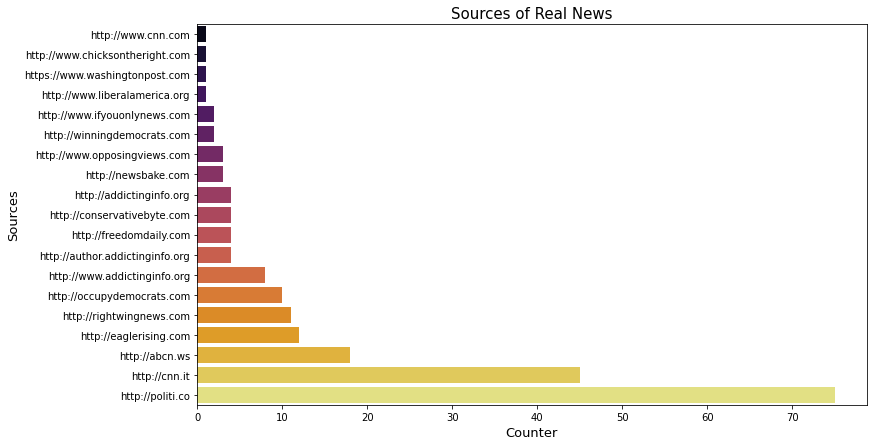

In [13]:
RealOrder=Data[Data['NewsType']=='Real']['source'].value_counts().sort_values(ascending=True).index
plt.figure(figsize=(12,7))
sns.countplot(y='source', data=Data[Data['NewsType']=='Real'],order=RealOrder,palette='inferno')
plt.xlabel('Counter',fontsize=13)
plt.ylabel('Sources',fontsize=13)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [ ]:
# Above plot represented observe that the politi.co reports maximum real news.

## Analysis of Sources of Fake News

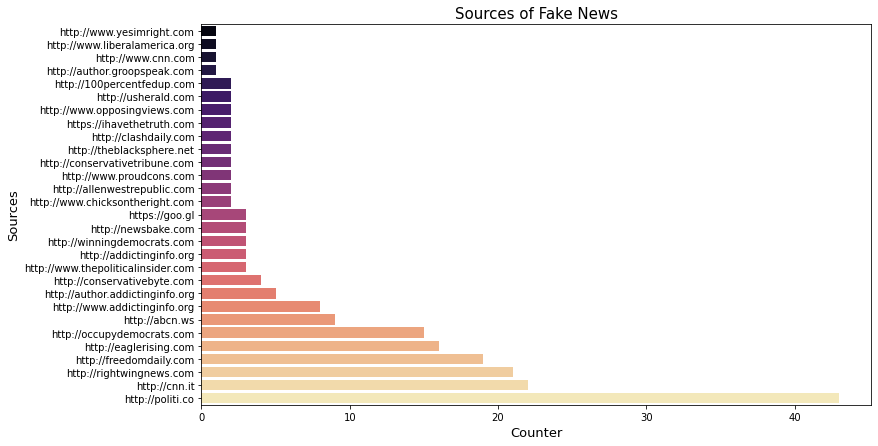

In [14]:
FakeOrder=Data[Data['NewsType']=='Fake']['source'].value_counts().sort_values(ascending=True).index
plt.figure(figsize=(12,7))
sns.countplot(y='source', data=Data[Data['NewsType']=='Fake'],order=FakeOrder,palette='magma')
plt.xlabel('Counter',fontsize=13)
plt.ylabel('Sources',fontsize=13)
plt.title('Sources of Fake News',fontsize=15)
plt.show()

In [ ]:
#With a tally of 45, also politi.co reports the most fakenews, as shown in the graph above. Furthermore, the number of bogus 
#news sources exceeds the number the number of valid news sources.

## Analysis of Common Sources of Real and Fake News

In [15]:
#first find list of common sources
common_sources=[]
for i in Data[Data['NewsType']=='Fake']['source'].unique():
    if i in Data[Data['NewsType']=='Real']['source'].unique():
        common_sources.append(i)
print(len(common_sources),' are common sources')

17  are common sources


In [16]:
#add new column for representation of comon source in data
Data['ComonSource']=Data['source'].apply(lambda i: i if i in common_sources else 0)
Data.head(3)

,title,text,source,NewsType,ForMovie,ForImage,ComonSource
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,0,1,http://eaglerising.com
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,0,1,http://abcn.ws
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,1,1,http://rightwingnews.com


In [17]:
#Now extract only common sources for analysis
ExtractData=Data[Data['ComonSource']!=0]
ExtractData.head()

,title,text,source,NewsType,ForMovie,ForImage,ComonSource
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,0,1,http://eaglerising.com
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,0,1,http://abcn.ws
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,1,1,http://rightwingnews.com
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real,0,1,http://politi.co
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real,0,1,http://abcn.ws


In [18]:
ExtractData.shape

(383, 7)

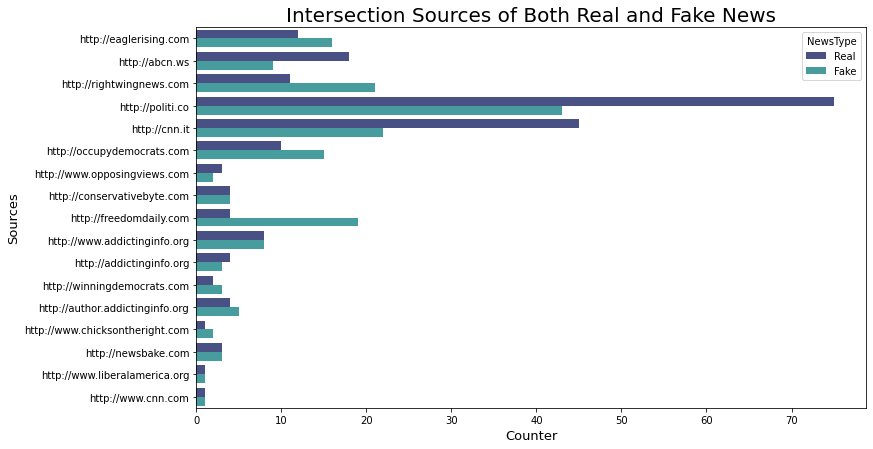

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(y='ComonSource',data=ExtractData, hue='NewsType',palette='mako')
plt.xlabel('Counter',fontsize=13)
plt.ylabel('Sources',fontsize=13)
plt.legend(loc='best', title='NewsType',fontsize=10)
plt.title('Intersection Sources of Both Real and Fake News',fontsize=20)
plt.show()

In [ ]:
#There are 17 common sources of true and false information. 
#It's noteworthy to note that these sources report fake news more frequently than real news. 
#Rightwingnews publishes a lot of bogus news, but it also publishes some actual news. 
#Approximately two-thirds of the news reported by rightwing outlets is false. 
#Beside, the second largest fake news reporting source, freedomdaily, scarcely reports actual news

## Analysis on the basisof Images and Sources

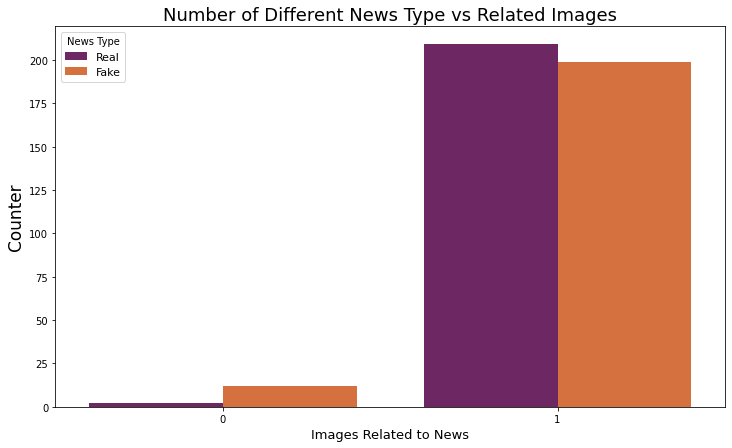

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(x='ForImage', data=Data, hue='NewsType', palette='inferno')
plt.xlabel('Images Related to News',fontsize=13)
plt.ylabel('Counter',fontsize=17)
plt.legend(loc='upper left', title='News Type',fontsize=11)
plt.title('Number of Different News Type vs Related Images',fontsize=18)
plt.show()

In [ ]:
#We can see from the graph above that the majority of real news sites used pictures in their articles. 
#Images might be seen of as evidence of their news. 
#As a conclusion, this variable reveals that visuals play a significant role in real news pieces. 
#The photos and videos variables provide little information to help us strengthen our analysis.

## Analysis on the basisof Movies and Sources

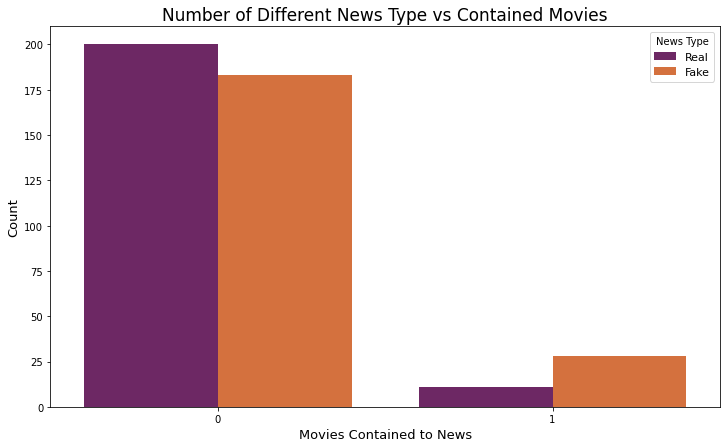

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='ForMovie', data=Data, hue='NewsType', palette='inferno')
plt.xlabel('Movies Contained to News',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.legend(loc='best', title='News Type',fontsize=11)
plt.title('Number of Different News Type vs Contained Movies',fontsize=17)
plt.show()

In [ ]:
#We can see from the graph above that most news stories do not feature movie clips, 
#and there are relatively few pieces that do. In our analysis, this variable does not provide any meaningful information.

## Analysis on the based of Text like Titlae and Body of News

## Text Processing

In [22]:
PS=PorterStemmer()
WST= WhitespaceTokenizer() 
#Function for text from upper to lower case
def LowerFunction(text):
    return text.lower()

#for Eliminating digits from the text
def RemoveNumber(text): 
    P_Data=' '
    for i in text:
        if i.isdigit()==False:
            P_Data=P_Data + i
    return P_Data

#for Eliminating punctuations from text 
def RemovePunction(text):
    P_Data=''
    for i in text:
        if i not in string.punctuation:
            P_Data = P_Data + i
    return P_Data

#for Eliminating special characters from text
def RemoveSpaceCharacter(text):
    P_Data=''
    for i in text:
        if (i.isalnum()==True) or (i==' '):
            P_Data = P_Data + i
    return P_Data

#for Eliminating stopwords from text
def RemoveStopwords(text):
    P_Data=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            P_Data.append(i)
    return " ".join(P_Data)

#for Conversion of Stemming Words to Root Words
def Steming(text):
    WordList = word_tokenize(text)
    terms = [PS.stem(i) for i in WordList]
    return ' '.join(terms)

#for Eliminating extra whitespaces from text 
def RemoveWhiteSpace(text):
    return(WST.tokenize(text))
#combine collection
def composition(YY, ZZ):
    return lambda I: YY(ZZ(I))

#collection of fi=unction
Final_Sequence=composition(
    composition(
        composition(
            composition(
                composition(
                    composition(RemoveWhiteSpace,Steming),
                    RemoveStopwords),
                RemoveSpaceCharacter),
            RemovePunction),
        RemoveNumber),
    LowerFunction)

### For Title of Fake News

In [23]:
#extract fake news from Data
Fake_Dataframe=Data[Data['NewsType']=='Fake']
Fake_Dataframe.shape

(211, 7)

In [24]:
#fiting and extraction embedind metrixes of words use in titlr
CountVectorizerization = CountVectorizer(analyzer = Final_Sequence)
#apply on title
CountVectorizerization.fit(Fake_Dataframe['title'])
#generate bag of words 
Bage_of_words_of_title=CountVectorizerization.transform(Fake_Dataframe['title'])
pd.DataFrame(Bage_of_words_of_title.todense()).shape

(211, 872)

In [25]:
#representation of bag of words mostly use in titles
list_of_words=[]
for i in range(0,872):
    list_of_words.append(CountVectorizerization.get_feature_names()[i])
print(list_of_words)

['abc', 'accept', 'accord', 'accus', 'act', 'actual', 'acut', 'ad', 'adapt', 'admin', 'administr', 'admit', 'adopt', 'affair', 'afghani', 'afraid', 'africa', 'agent', 'ahmad', 'aid', 'airstrik', 'alcohol', 'aleppo', 'alert', 'alter', 'ambassador', 'america', 'american', 'among', 'andrew', 'angela', 'annihil', 'announc', 'anthem', 'antilgbt', 'antimuslim', 'antitrump', 'ap', 'arab', 'arabia', 'arizona', 'arm', 'armi', 'arnold', 'ask', 'attack', 'attend', 'auction', 'audienc', 'australia', 'awkward', 'babi', 'back', 'bad', 'ban', 'barney', 'bash', 'bathroom', 'battl', 'bday', 'beat', 'beck', 'becom', 'begin', 'believ', 'bet', 'better', 'bid', 'biden', 'big', 'biggest', 'bill', 'billion', 'birth', 'birther', 'bitch', 'black', 'blacklivesmatt', 'blame', 'blast', 'blow', 'bodi', 'bomb', 'bomber', 'bombshel', 'boom', 'border', 'born', 'botswana', 'boy', 'brand', 'brandish', 'break', 'breakdown', 'bridgeg', 'bring', 'broke', 'brutal', 'budget', 'buri', 'bush', 'busi', 'bustedher', 'buy', 'buy

In [26]:
#generate matrix against counts of words
Matrx_of_TWords=pd.DataFrame(Bage_of_words_of_title.todense(),columns=list_of_words)
Matrx_of_TWords

,abc,accept,accord,accus,act,actual,acut,ad,adapt,admin,...,would,wreck,wrong,wwii,yeah,year,yearold,yet,york,youll
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#allign and sum of frequency count of word
Sum_of_title_Matrix=[]
for x in list_of_words:
    Sum_of_title_Matrix.append(Matrx_of_TWords[x].sum())
print(Sum_of_title_Matrix)

[4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 6, 3, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 4, 1, 3, 3, 1, 1, 1, 2, 1, 1, 10, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 7, 5, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 7, 1, 3, 1, 1, 1, 1, 2, 1, 4, 1, 1, 29, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 14, 1, 1, 3, 2, 5, 1, 1, 14, 1, 1, 1, 1, 3, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 6, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 15, 1, 3, 1, 1, 1, 2, 2, 1, 16, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 5, 1, 1, 15, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 6, 1, 1, 1

In [29]:
#take Transpose
TransposeMatrx_of_TWords = Matrx_of_TWords.transpose()
#rearrangement
TransposeMatrx_of_TWords['SUM'] = Sum_of_title_Matrix
TransposeMatrx_of_TWords

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,SUM
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
accord,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
accus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
act,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
yearold,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
yet,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
york,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [30]:
#representation top 25 matrix value
TopFTValues=TransposeMatrx_of_TWords.sort_values(by='SUM', ascending=False).head(25)

In [31]:
#remove unncessary columns
TopFTValues.drop(list(range(0,211)),axis=1,inplace=True)

In [32]:
#add type column for differention and graph ploting
TopFTValues['Type'] = ['Fake']*25
TopFTValues

,SUM,Type
trump,59,Fake
hillari,31,Fake
clinton,29,Fake
obama,26,Fake
video,20,Fake
rise,16,Fake
eagl,16,Fake
freedom,15,Fake
donald,15,Fake
debat,14,Fake


### For Title of Real News

In [33]:
#extract fake news from Data
Real_Dataframe=Data[Data['NewsType']=='Real']
Real_Dataframe.shape

(211, 7)

In [34]:
#fiting and extraction embedind metrixes of words use in real title
CountVectorizerization = CountVectorizer(analyzer = Final_Sequence)
#apply on title
CountVectorizerization.fit(Real_Dataframe['title'])
#generate bag of words 
Bage_of_words_of_Rtitle=CountVectorizerization.transform(Real_Dataframe['title'])
pd.DataFrame(Bage_of_words_of_Rtitle.todense()).shape

(211, 835)

In [35]:
#representation of bag of words mostly use in titles
list_of_RTwords=[]
for i in range(0,835):
    list_of_RTwords.append(CountVectorizerization.get_feature_names()[i])
print(list_of_RTwords)

['abc', 'abl', 'accord', 'ad', 'adopt', 'affair', 'affect', 'afghani', 'afraid', 'africa', 'agent', 'ahead', 'ahmad', 'aid', 'airstrik', 'aleppo', 'alleg', 'alter', 'alway', 'ambassador', 'ambush', 'america', 'american', 'among', 'andrew', 'annihil', 'announc', 'anoth', 'answer', 'anthem', 'anthoni', 'antilgbt', 'antitrump', 'anymor', 'apolog', 'arabia', 'arent', 'arizona', 'arm', 'arnold', 'arpaio', 'arraign', 'ask', 'attack', 'attend', 'attorney', 'audit', 'author', 'awkward', 'back', 'bad', 'ban', 'barack', 'barney', 'base', 'bassist', 'bathroom', 'battl', 'bday', 'beck', 'becom', 'begin', 'benjamin', 'bid', 'biden', 'big', 'biggest', 'bill', 'bind', 'birth', 'birther', 'bitch', 'black', 'blame', 'blast', 'bleed', 'blow', 'bobbi', 'bomb', 'bomber', 'bombshel', 'bono', 'botswana', 'bound', 'boy', 'brazil', 'break', 'bridgeg', 'bring', 'brodi', 'brutal', 'budget', 'build', 'buri', 'bush', 'busi', 'buy', 'buyer', 'california', 'call', 'camp', 'campaign', 'campu', 'can', 'cancel', 'cand

In [36]:
#generate matrix against counts of words
Matrx_of_RTWords = pd.DataFrame(Bage_of_words_of_Rtitle.todense(),columns=list_of_RTwords)
Matrx_of_RTWords

,abc,abl,accord,ad,adopt,affair,affect,afghani,afraid,africa,...,worst,would,wound,wreck,wwii,yeah,year,yearold,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#allign and sum of frequency count of word
Sum_of_title_RTMatrix=[]
for x in list_of_RTwords:
    Sum_of_title_RTMatrix.append(Matrx_of_RTWords[x].sum())
print(Sum_of_title_RTMatrix)

[4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 6, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 5, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 8, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 26, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 1, 5, 1, 1, 19, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 6, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 24, 1, 2, 1, 1, 3, 2, 1, 1, 11, 2, 1, 2, 1, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 7, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 16, 1, 

In [38]:
#take Transpose
TransposeMatrx_of_RTWords = Matrx_of_RTWords.transpose()
#rearrangement
TransposeMatrx_of_RTWords['SUM'] = Sum_of_title_RTMatrix

In [39]:
#representation top 25 matrix value
TopRTValues = TransposeMatrx_of_RTWords.sort_values(by='SUM', ascending=False).head(25)

In [40]:
TopRTValues.drop(list(range(0,211)),axis=1,inplace=True)
#add type column for differention and graph ploting
TopRTValues['Type'] = ['Real']*25

In [41]:
TopRTValues

,SUM,Type
trump,84,Real
clinton,26,Real
donald,24,Real
obama,22,Real
video,21,Real
debat,19,Real
hillari,16,Real
us,13,Real
rise,12,Real
news,12,Real


In [42]:
combined_data=pd.concat([TopRTValues,TopFTValues])
combined_data

,SUM,Type
trump,84,Real
clinton,26,Real
donald,24,Real
obama,22,Real
video,21,Real
debat,19,Real
hillari,16,Real
us,13,Real
rise,12,Real
news,12,Real


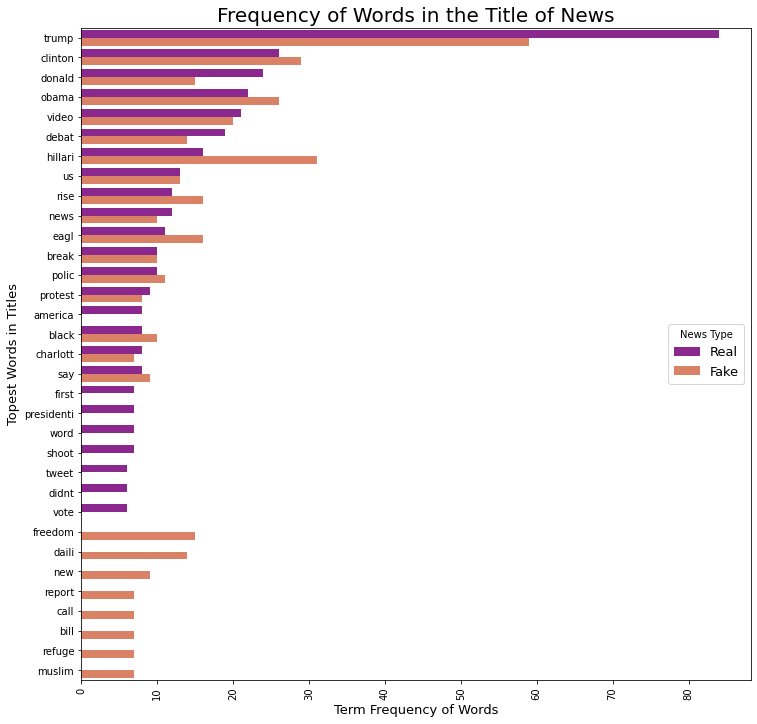

In [43]:
#Graphical representation
plt.figure(figsize=(12,12))
sns.barplot(y=combined_data.index, x='SUM', data= combined_data, hue='Type',palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=13)
plt.ylabel('Topest Words in Titles',fontsize=13)
plt.legend(title='News Type',fontsize=13)
plt.title('Frequency of Words in the Title of News',fontsize=20)
plt.show()

In [ ]:
#The term frequency plot reveals that some words, such as hillari, clinton, freedom, and obama, are associated with false news, 
#while others, such as trump, clinton, Donald, and debate, are associated with true news.

## Analysis on the basis of Body of News

### For Fake NEWS

In [44]:
#fiting and extraction embedind metrixes of words use in body
FBCountVectorizerization = CountVectorizer(analyzer = Final_Sequence)
#apply on on body
FBCountVectorizerization.fit(Fake_Dataframe['text'])
#generate bag of words 
Bage_of_words_of_title = FBCountVectorizerization.transform(Fake_Dataframe['text'])
pd.DataFrame(Bage_of_words_of_title.todense()).shape

(211, 10086)

In [47]:
#representation of bag of words mostly use in body
list_of_FBwords=[]
for i in range(0,10086):
    list_of_FBwords.append(FBCountVectorizerization.get_feature_names()[i])
print(list_of_FBwords)

['aa', 'aachen', 'aaron', 'aback', 'abandon', 'abbi', 'abbrevi', 'abc', 'abcpolit', 'abdel', 'abdullah', 'abe', 'abedin', 'abedinappar', 'abhorrenthop', 'abid', 'abil', 'abl', 'abnorm', 'aboard', 'abomin', 'abort', 'aboutfac', 'abraham', 'abridg', 'abroad', 'abroadbil', 'abroadbuchanan', 'abroaddonald', 'abroadth', 'abroadto', 'abruptli', 'absenc', 'absente', 'absenteealaska', 'absenteedistrict', 'absenteeflorida', 'absenteelouisiana', 'absenteeminnesota', 'absenteemissouri', 'absenteemontana', 'absenteenew', 'absenteenorth', 'absenteerhod', 'absenteesouth', 'absenteevermont', 'absolut', 'absolutelyf', 'absolutelystori', 'absolv', 'absorb', 'abstainso', 'absurd', 'abus', 'abusesay', 'abysm', 'acceler', 'accept', 'acceptanceit', 'access', 'accommod', 'accommodationth', 'accompani', 'accomplic', 'accomplish', 'accord', 'accordinglywronga', 'account', 'accountabilitywhatev', 'accumul', 'accur', 'accuraci', 'accus', 'accusedth', 'achiev', 'achievementsdelaurenti', 'ackerman', 'acknowledg',

In [48]:
#generate matrix against counts of words
Matrx_of_FBWords=pd.DataFrame(Bage_of_words_of_title.todense(),columns = list_of_FBwords)
Matrx_of_FBWords

,aa,aachen,aaron,aback,abandon,abbi,abbrevi,abc,abcpolit,abdel,...,zeliz,zen,zero,zika,zimbabwean,zimmer,zimmerman,zinger,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#allign and sum of frequency count of word
Sum_of_title_FBMatrix=[]
for x in list_of_FBwords:
    Sum_of_title_FBMatrix.append(Matrx_of_FBWords[x].sum())
print(Sum_of_title_FBMatrix)

[1, 1, 4, 1, 10, 1, 2, 20, 8, 2, 2, 11, 8, 1, 1, 1, 11, 29, 1, 3, 3, 1, 2, 2, 1, 4, 2, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 9, 1, 1, 4, 22, 1, 18, 1, 1, 1, 1, 2, 78, 1, 22, 1, 2, 2, 1, 26, 1, 7, 1, 1, 16, 2, 1, 4, 1, 1, 28, 49, 37, 1, 1, 1, 1, 1, 14, 8, 1, 1, 1, 2, 5, 2, 48, 1, 51, 7, 8, 1, 1, 2, 9, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 20, 27, 1, 1, 1, 1, 1, 1, 43, 1, 1, 1, 2, 3, 26, 2, 1, 2, 1, 5, 68, 9, 8, 23, 2, 7, 1, 25, 18, 7, 2, 8, 1, 2, 1, 10, 1, 1, 4, 2, 3, 2, 5, 1, 1, 12, 1, 11, 8, 2, 8, 34, 1, 2, 6, 1, 10, 1, 1, 2, 1, 1, 1, 1, 1, 1, 14, 1, 11, 14, 1, 1, 19, 13, 1, 23, 1, 1, 1, 2, 32, 10, 1, 18, 1, 17, 74, 1, 1, 1, 4, 7, 1, 20, 1, 2, 1, 2, 2, 3, 1, 4, 2, 3, 1, 1, 1, 2, 6, 4, 1, 1, 5, 3, 2, 1, 1, 6, 1, 1, 1, 1, 10, 1, 1, 1, 7, 2, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 2, 1, 5, 1, 1, 1, 1, 17, 8, 2, 1, 1, 1, 23, 10, 1, 2, 1, 1, 5, 3, 63, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 27, 2, 12, 1, 1, 27, 1, 1, 1, 1, 38, 1, 4, 200, 1, 5, 3, 1, 9, 18, 1, 3, 1, 1, 6, 1,

In [52]:
#take Transpose
TransposeMatrx_of_FBWords = Matrx_of_FBWords.transpose()
#rearrangement
TransposeMatrx_of_FBWords['SUM'] = Sum_of_title_FBMatrix
TopFBValues = TransposeMatrx_of_FBWords.sort_values(by='SUM', ascending=False).head(40)
TopFBValues

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,SUM
trump,14,0,1,11,0,0,0,0,1,0,...,0,83,3,14,25,0,2,3,6,849
clinton,11,19,13,6,0,0,9,0,19,0,...,19,37,0,18,1,0,2,0,1,603
said,1,4,0,3,0,2,0,0,1,0,...,4,24,3,6,6,0,5,3,0,461
hillari,1,2,16,3,0,0,2,7,9,0,...,2,6,0,3,1,0,2,0,1,326
would,0,3,1,3,0,0,0,0,1,0,...,3,8,1,1,3,0,16,1,2,315
state,1,6,2,0,0,0,3,0,1,0,...,6,10,0,6,3,2,12,0,0,305
one,0,4,1,2,0,1,0,1,1,0,...,4,10,0,2,4,4,9,0,0,303
presid,0,5,3,3,0,3,0,0,4,0,...,5,9,0,0,1,0,16,0,0,301
peopl,4,2,1,1,0,0,1,0,1,0,...,2,14,3,5,2,0,2,1,1,290
new,1,3,4,4,0,0,0,0,0,0,...,3,8,0,8,5,0,6,0,0,270


In [53]:
TopFBValues.drop(list(range(0,211)),axis=1,inplace=True)
TopFBValues['Type']=['Fake']*40


In [54]:
TopFBValues

,SUM,Type
trump,849,Fake
clinton,603,Fake
said,461,Fake
hillari,326,Fake
would,315,Fake
state,305,Fake
one,303,Fake
presid,301,Fake
peopl,290,Fake
new,270,Fake


### For Real News

In [55]:
#fiting and extraction embedind metrixes of words use in body
RBCountVectorizerization = CountVectorizer(analyzer = Final_Sequence)
#apply on on body
RBCountVectorizerization.fit(Real_Dataframe['text'])
#generate bag of words 
Bage_of_words_of_title = FBCountVectorizerization.transform(Real_Dataframe['text'])
pd.DataFrame(Bage_of_words_of_title.todense()).shape

(211, 10086)

In [56]:
#representation of bag of words mostly use in body
list_of_RBwords=[]
for i in range(0,10086):
    list_of_RBwords.append(RBCountVectorizerization.get_feature_names()[i])
print(list_of_RBwords)

['aa', 'aachen', 'aaron', 'ab', 'aback', 'abandon', 'abbi', 'abbrevi', 'abc', 'abcpolit', 'abdel', 'abe', 'abid', 'abil', 'abl', 'abnorm', 'aboard', 'abort', 'abound', 'aboutaddingeveri', 'abovethefold', 'abraham', 'abram', 'abridg', 'abroad', 'abroadand', 'abroadbil', 'abroadbuchanan', 'abroaddonald', 'abroadto', 'abruptli', 'absente', 'absenteealaska', 'absenteedistrict', 'absenteeflorida', 'absenteelouisiana', 'absenteeminnesota', 'absenteemissouri', 'absenteemontana', 'absenteenew', 'absenteenorth', 'absenteerhod', 'absenteesouth', 'absenteevermont', 'absolut', 'absolutelystori', 'absolv', 'absorb', 'abstainso', 'abstract', 'absurd', 'absurda', 'abundantli', 'abus', 'abusesay', 'abysm', 'academ', 'academi', 'acceler', 'accept', 'access', 'accid', 'accommod', 'accommodationth', 'accompani', 'accomplic', 'accomplish', 'accord', 'accordinglyi', 'accordinglywronga', 'account', 'accountabilitywhatev', 'accru', 'accumul', 'accur', 'accuraci', 'accus', 'accusedth', 'achiev', 'achievements

In [57]:
#generate matrix against counts of words
Matrx_of_RBWords = pd.DataFrame(Bage_of_words_of_title.todense(),columns = list_of_RBwords)
Matrx_of_RBWords

,aa,aachen,aaron,ab,aback,abandon,abbi,abbrevi,abc,abcpolit,...,trapp,trash,trautmann,travail,travel,trayvon,tread,treasonfor,treasuri,treat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#allign and sum of frequency count of word
Sum_of_title_RBMatrix=[]
for x in list_of_RBwords:
    Sum_of_title_RBMatrix.append(Matrx_of_RBWords[x].sum())
print(Sum_of_title_RBMatrix)

[1, 1, 1, 1, 13, 2, 1, 33, 8, 2, 0, 11, 0, 0, 0, 1, 13, 35, 1, 3, 0, 1, 0, 2, 1, 6, 1, 2, 1, 0, 1, 1, 0, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 0, 1, 1, 3, 1, 3, 7, 1, 1, 1, 20, 0, 18, 3, 1, 1, 1, 6, 92, 1, 20, 1, 1, 3, 1, 30, 1, 10, 1, 1, 19, 2, 1, 3, 1, 1, 25, 43, 39, 1, 1, 0, 1, 0, 9, 10, 0, 0, 0, 0, 5, 3, 43, 1, 74, 9, 0, 0, 0, 0, 13, 1, 1, 1, 1, 0, 1, 0, 4, 1, 1, 16, 37, 0, 0, 1, 0, 1, 1, 27, 1, 1, 0, 8, 2, 16, 0, 0, 2, 3, 2, 38, 3, 11, 20, 2, 2, 1, 13, 44, 8, 2, 6, 1, 2, 0, 16, 1, 1, 8, 2, 2, 2, 6, 4, 1, 12, 0, 7, 3, 1, 10, 51, 1, 2, 10, 1, 11, 1, 0, 1, 1, 0, 0, 1, 1, 1, 10, 1, 10, 11, 1, 0, 10, 10, 2, 22, 1, 1, 0, 2, 32, 14, 1, 26, 0, 17, 64, 1, 1, 1, 5, 7, 0, 20, 0, 3, 1, 2, 2, 4, 1, 4, 2, 3, 1, 0, 1, 1, 9, 3, 1, 3, 3, 3, 1, 3, 1, 1, 0, 0, 1, 1, 10, 1, 2, 1, 7, 1, 2, 1, 1, 1, 2, 0, 5, 1, 1, 1, 3, 3, 1, 0, 0, 1, 2, 16, 7, 2, 2, 0, 1, 23, 12, 1, 2, 0, 0, 3, 0, 57, 0, 1, 1, 2, 1, 1, 0, 3, 1, 1, 2, 29, 2, 8, 1, 0, 28, 3, 1, 1, 1, 34, 1, 0, 221, 1, 4, 4, 1, 9, 23, 0, 3, 0, 1, 6,

In [59]:
#take Transpose
TransposeMatrx_of_RBWords = Matrx_of_RBWords.transpose()
#rearrangement
TransposeMatrx_of_RBWords['SUM'] = Sum_of_title_RBMatrix
TopRBValues = TransposeMatrx_of_RBWords.sort_values(by='SUM', ascending=False).head(40)
TopRBValues

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,SUM
spurn,2,7,0,11,0,0,31,0,0,29,...,0,83,3,14,25,0,2,3,6,1184
problemsneith,3,5,1,2,0,0,21,1,0,12,...,4,24,3,6,6,0,5,3,0,663
charleston,2,0,0,7,1,1,27,0,0,22,...,19,37,0,18,1,0,2,0,1,539
psychiatr,3,2,1,4,1,0,9,0,0,5,...,2,17,1,2,4,0,1,0,3,348
onesid,1,0,0,2,8,0,6,0,1,3,...,5,9,0,0,1,0,16,0,0,342
toddler,0,1,0,0,6,0,1,1,0,5,...,3,8,1,1,3,0,16,1,2,333
march,7,1,0,1,0,0,6,0,0,2,...,3,8,0,8,5,0,6,0,0,320
minimum,0,2,0,6,0,2,3,1,0,8,...,4,10,0,2,4,4,9,0,0,314
coverageexecut,0,0,0,1,0,0,12,0,0,16,...,0,3,0,23,0,0,0,0,0,307
russia,0,0,4,5,4,0,3,0,0,4,...,6,10,0,6,3,2,12,0,0,303


In [60]:
TopRBValues.drop(list(range(0,211)),axis=1,inplace=True)
TopRBValues['Type']=['Real']*40

In [61]:
TopRBValues

,SUM,Type
spurn,1184,Real
problemsneith,663,Real
charleston,539,Real
psychiatr,348,Real
onesid,342,Real
toddler,333,Real
march,320,Real
minimum,314,Real
coverageexecut,307,Real
russia,303,Real


In [62]:
combined_Bdata=pd.concat([TopRBValues,TopFBValues])
combined_Bdata

,SUM,Type
spurn,1184,Real
problemsneith,663,Real
charleston,539,Real
psychiatr,348,Real
onesid,342,Real
...,...,...
million,142,Fake
thing,140,Fake
support,138,Fake
think,136,Fake


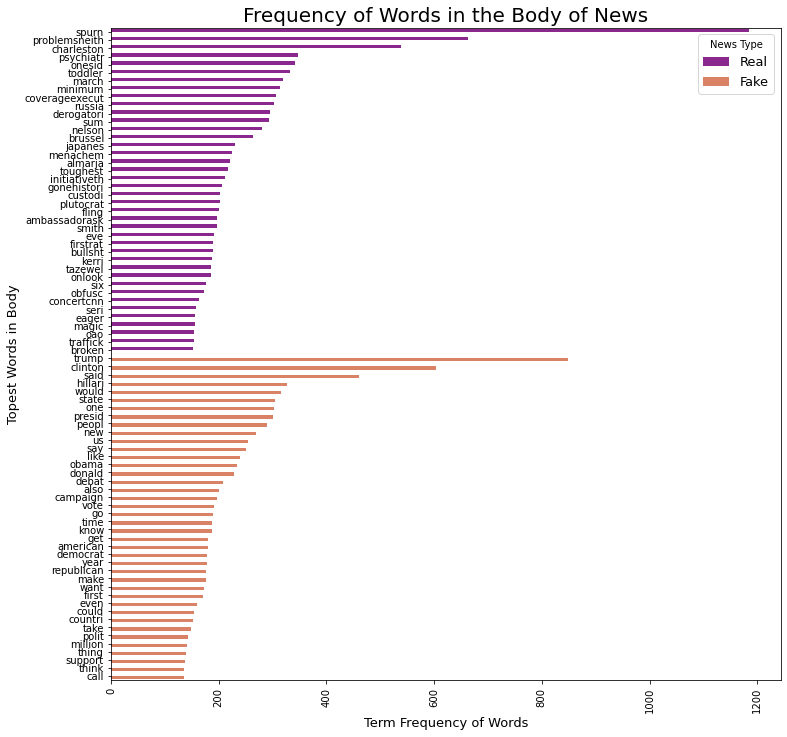

In [63]:
#Graphical representation
plt.figure(figsize=(12,12))
sns.barplot(y=combined_Bdata.index, x='SUM', data= combined_Bdata, hue='Type',palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=13)
plt.ylabel('Topest Words in Body',fontsize=13)
plt.legend(title='News Type',fontsize=13)
plt.title('Frequency of Words in the Body of News',fontsize=20)
plt.show()

In [ ]:
#We can see from the above plot that the most common words in the news text are trump and clinton. 
#The term frequency plot reveals that fake news is represented by words like clinton, hillari, and trump, 
#while real news is represented by words like trump, said, and clinton.

#  Fake/Real News Detection Based on News Body

## Using Random Forest with text Processing

In [126]:
TData=pd.concat([Fack_News, Real_News],axis=0)
TData['NewsType'] = TData["id"].apply(lambda x: x.split('_')[0])
X = TData['text']
Y = TData['NewsType']
#spliting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print('X TRAIN = ',X_train.shape)
print('Y TRAIN = ',y_train.shape)
print('X TEST = ',X_test.shape)
print('Y TEST = ',y_test.shape)

X TRAIN =  (127,)
Y TRAIN =  (127,)
X TEST =  (55,)
Y TEST =  (55,)


In [125]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [66]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

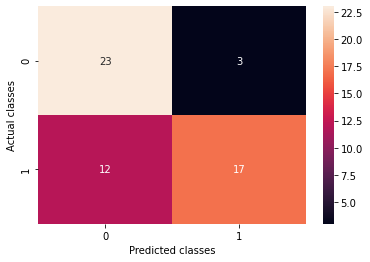

In [67]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [68]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.66      0.88      0.75        26
        Real       0.85      0.59      0.69        29

    accuracy                           0.73        55
   macro avg       0.75      0.74      0.72        55
weighted avg       0.76      0.73      0.72        55



## Using Random Forest without text Processing

In [69]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [70]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

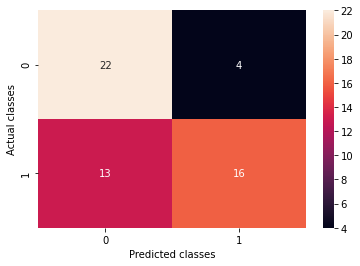

In [71]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [72]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.63      0.85      0.72        26
        Real       0.80      0.55      0.65        29

    accuracy                           0.69        55
   macro avg       0.71      0.70      0.69        55
weighted avg       0.72      0.69      0.69        55



## Using Naive Bayes  with text Processing

In [73]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [74]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

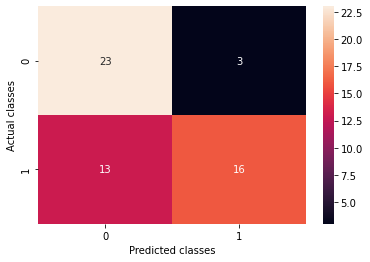

In [76]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [75]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.64      0.88      0.74        26
        Real       0.84      0.55      0.67        29

    accuracy                           0.71        55
   macro avg       0.74      0.72      0.70        55
weighted avg       0.75      0.71      0.70        55



## Using Naive Bayes  without text Processing

In [77]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

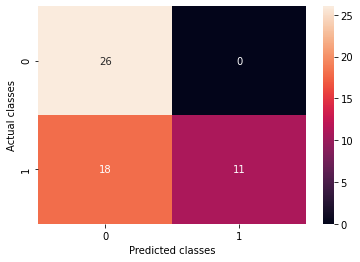

In [79]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [80]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.59      1.00      0.74        26
        Real       1.00      0.38      0.55        29

    accuracy                           0.67        55
   macro avg       0.80      0.69      0.65        55
weighted avg       0.81      0.67      0.64        55



## Using Passive Aggressive with text Processing

In [81]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [82]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

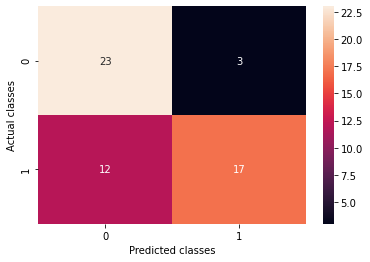

In [83]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [84]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.66      0.88      0.75        26
        Real       0.85      0.59      0.69        29

    accuracy                           0.73        55
   macro avg       0.75      0.74      0.72        55
weighted avg       0.76      0.73      0.72        55



## Using Passive Aggressive without text Processing

In [85]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [86]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

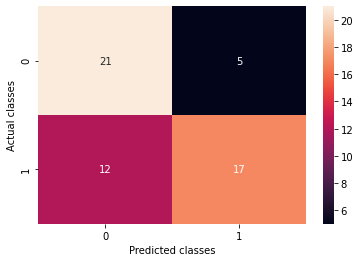

In [87]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [88]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.64      0.81      0.71        26
        Real       0.77      0.59      0.67        29

    accuracy                           0.69        55
   macro avg       0.70      0.70      0.69        55
weighted avg       0.71      0.69      0.69        55



## Using Logestic Regression with text Processing

In [127]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [128]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

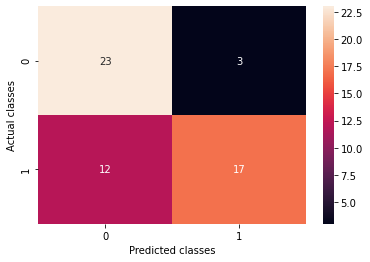

In [129]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [130]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.66      0.88      0.75        26
        Real       0.85      0.59      0.69        29

    accuracy                           0.73        55
   macro avg       0.75      0.74      0.72        55
weighted avg       0.76      0.73      0.72        55



## Using Logestic Regression without text Processing

In [131]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [132]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

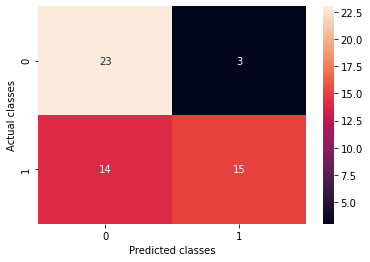

In [133]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [134]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.62      0.88      0.73        26
        Real       0.83      0.52      0.64        29

    accuracy                           0.69        55
   macro avg       0.73      0.70      0.68        55
weighted avg       0.73      0.69      0.68        55



# Fake/Real News Detection Based on News Title

## Using Random Forest with text Processing

In [89]:
X = TData['title']
Y = TData['NewsType']
#spliting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print('X TRAIN = ',X_train.shape)
print('Y TRAIN = ',y_train.shape)
print('X TEST = ',X_test.shape)
print('Y TEST = ',y_test.shape)

X TRAIN =  (127,)
Y TRAIN =  (127,)
X TEST =  (55,)
Y TEST =  (55,)


In [90]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [91]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

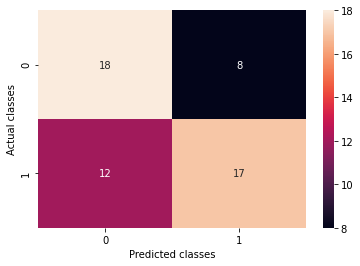

In [92]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [93]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.60      0.69      0.64        26
        Real       0.68      0.59      0.63        29

    accuracy                           0.64        55
   macro avg       0.64      0.64      0.64        55
weighted avg       0.64      0.64      0.64        55



## Using Random Forest without text Processing

In [94]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [95]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

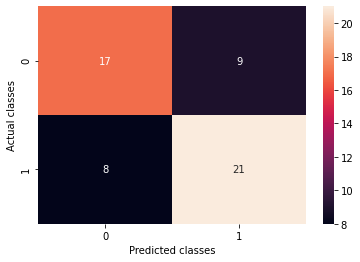

In [96]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [97]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.68      0.65      0.67        26
        Real       0.70      0.72      0.71        29

    accuracy                           0.69        55
   macro avg       0.69      0.69      0.69        55
weighted avg       0.69      0.69      0.69        55



## Using Naive Bayes with text Processing

In [98]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [99]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

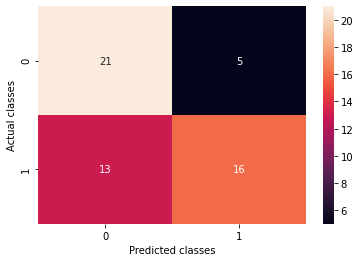

In [100]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [101]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.62      0.81      0.70        26
        Real       0.76      0.55      0.64        29

    accuracy                           0.67        55
   macro avg       0.69      0.68      0.67        55
weighted avg       0.69      0.67      0.67        55



## Using Naive Bayes without text Processing

In [102]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [103]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

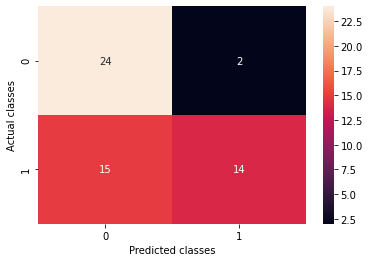

In [104]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [105]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.62      0.92      0.74        26
        Real       0.88      0.48      0.62        29

    accuracy                           0.69        55
   macro avg       0.75      0.70      0.68        55
weighted avg       0.75      0.69      0.68        55



## Using Passive Aggressive with text Processing

In [106]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [107]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

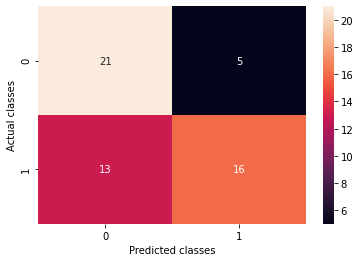

In [108]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [109]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.62      0.81      0.70        26
        Real       0.76      0.55      0.64        29

    accuracy                           0.67        55
   macro avg       0.69      0.68      0.67        55
weighted avg       0.69      0.67      0.67        55



# Using Passive Aggressive without text Processing

In [110]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [111]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

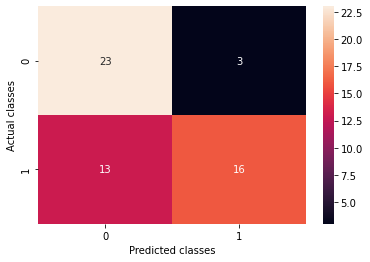

In [112]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [113]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.64      0.88      0.74        26
        Real       0.84      0.55      0.67        29

    accuracy                           0.71        55
   macro avg       0.74      0.72      0.70        55
weighted avg       0.75      0.71      0.70        55



## Using Logestic Regression with text Processing

In [115]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer(analyzer=Final_Sequence)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function composition.<locals>.<lambda> at 0x00000216165D0CA0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [116]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

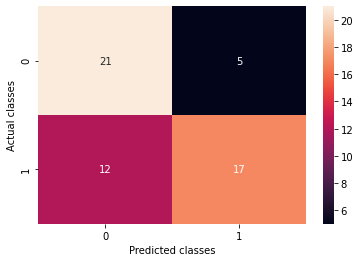

In [117]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [118]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.64      0.81      0.71        26
        Real       0.77      0.59      0.67        29

    accuracy                           0.69        55
   macro avg       0.70      0.70      0.69        55
weighted avg       0.71      0.69      0.69        55



## Using Logestic Regression without text Processing

In [119]:
#Design piple before traning
Pipline_Col=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])
#for traing
Pipline_Col.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [120]:
#for testing
Predictions=Pipline_Col.predict(X_test)

Text(33.0, 0.5, 'Actual classes')

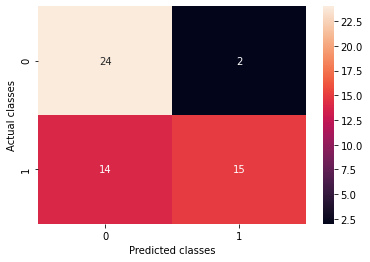

In [121]:
#set parameter in function
cfm = confusion_matrix(y_test, Predictions)
#draw heatmap
sns.heatmap(cfm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [122]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

        Fake       0.63      0.92      0.75        26
        Real       0.88      0.52      0.65        29

    accuracy                           0.71        55
   macro avg       0.76      0.72      0.70        55
weighted avg       0.76      0.71      0.70        55

